In [66]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.decomposition import SparsePCA, NMF
from sklearn.metrics import mean_squared_error #explained_variance_score

from scipy.sparse import csr_matrix

## Dimensionality Reduction on 1011 Venue Categories

This sort of sparce matrix of frequencies 0 to 1 highly resembles TF-IDF. 
We can apply the same dimentionality reduction techniques as we might to text. 
In the text case, NMF itentifies patterns in documents (topics). In our case, 
we look for patterns in venue types.

In [46]:
venue_frequency = pd.read_csv('data/world_venues_frequency.csv', index_col=0)
venue_frequency

,"Богданов и партнеры""""""","""""dakineshop.ru""""""","117""""""","12""""""","13""""""","17""""""","18""""""","18.""","34""""""","38""""""",...,Zhejiang Restaurant,Zoo,Zoo Exhibit,"quando e dove vuoi tu """"""",Çöp Şiş Place,"Корпорация СБР""","д.24""""""","не Дай Другим""""""","площадка #2""","студия звукозаписи."""
City,,,,,,,,,,,,,,,,,,,,,
Bangalore,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.000000,0.000071,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Tangerang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.000000,0.000256,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Casablanca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.000322,0.000322,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Cairo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Phoenix,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.000000,0.000539,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Munich,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Bogotá,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.000000,0.000144,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
Makasar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [34]:
venue_frequency.mean().values

array([8.79557839e-02, 1.61837438e-07, 1.61837438e-07, ...,
       1.61837438e-07, 3.51764380e-07, 1.61837438e-07])

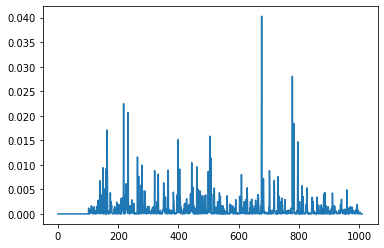

In [47]:
plt.plot(venue_frequency.mean().values)

In [52]:
venue_frequency.columns[venue_frequency.mean() > 0.015]

Index(['Bank', 'Building', 'Café', 'Factory', 'Hotel', 'Office',
       'Residential Building (Apartment / Condo)', 'Road'],
      dtype='object')

In [3]:
# This sort of sparce matrix of frequencies 0 to 1 highly resembles TF-IDF. 
# We can apply the same dimentionality reduction techniques as we might to text. 
# In the text case, NMF itentifies patterns in topics. In our case, we look for 
# patterns in venue types.

In [57]:
len(venue_frequency.columns)

1011

In [54]:
freq_matrix = csr_matrix(venue_frequency)
freq_matrix

<250x1011 sparse matrix of type '<class 'numpy.float64'>'
	with 88480 stored elements in Compressed Sparse Row format>

In [11]:
nmf_dict = {}

In [71]:
X = freq_matrix

nmf_results = []

for i in range(1,101):
    
    folds = KFold(n_splits=5)
    train_scores = []
    test_scores = []

    for train_index, test_index in folds.split(X):
        X_train, X_test = X[train_index], X[test_index]

        model = NMF(n_components=i)

        model.fit(X_train)
        nmf_features = model.transform(X_train)
        
        predict_train = model.inverse_transform(model.transform(X_train))
        score_train = mean_squared_error(X_train.toarray(), predict_train)
        train_scores.append(score_train)

        predict_test = model.inverse_transform(model.transform(X_test))
        score_test = mean_squared_error(X_test.toarray(), predict_test)
        test_scores.append(score_test)

#         nmf_dict[i][test_index]['features'] = nmf_features
#         nmf_dict[i][test_index]['components'] = model.components_
        
        # Print the NMF features
#         print('FEATURES', nmf_features)
#         print('COMPONENTS', model.components_)
        
    nmf_results.append({'train_score': np.mean(train_scores), 'test_score': np.mean(test_scores)})

results = [(r.get('train_score'), r.get('test_score')) for r in nmf_results]
results

[(9.186196591858323e-06, 9.274638760357097e-06),
 (8.08576270122535e-06, 8.601682892956463e-06),
 (7.152922051928595e-06, 7.437076847008564e-06),
 (6.5006951642059985e-06, 7.01736994591303e-06),
 (5.918437833395653e-06, 6.483468849586428e-06),
 (5.397446988695204e-06, 6.053750263356219e-06),
 (4.957421696510067e-06, 5.72636391657135e-06),
 (4.550343401030641e-06, 5.496389403067538e-06),
 (4.242558073672963e-06, 5.23391768605488e-06),
 (3.9646929075041906e-06, 5.00693465810989e-06),
 (3.7041410593490007e-06, 4.801939242537532e-06),
 (3.4826381235028634e-06, 4.615771219716101e-06),
 (3.2622427672875513e-06, 4.427893713058426e-06),
 (3.0939687626595912e-06, 4.259592678222009e-06),
 (2.9283454869870827e-06, 4.013581551203551e-06),
 (2.7879422057863317e-06, 3.852771247800895e-06),
 (2.670222699377996e-06, 3.7543556119119343e-06),
 (2.5466828524272343e-06, 3.6407503159560688e-06),
 (2.447311444098347e-06, 3.5944612403869497e-06),
 (2.3422673596191157e-06, 3.512457381873588e-06),
 (2.25311551

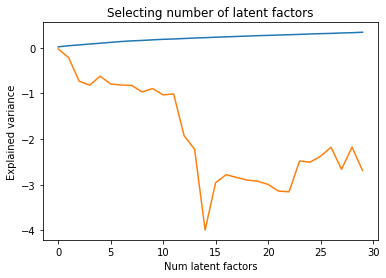

In [64]:
plt.plot(results)
plt.title('Selecting number of latent factors')
plt.xlabel('Num latent factors')
plt.ylabel('Explained variance')
plt.show()

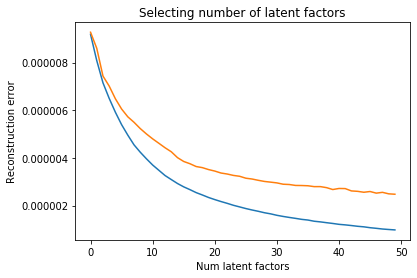

In [70]:
plt.plot(results)
plt.title('Selecting number of latent factors')
plt.xlabel('Num latent factors')
plt.ylabel('Reconstruction error')
plt.show()

In [59]:
# http://statweb.stanford.edu/~owen/reports/AOAS227.pdf
# Try using bi-cross validation (column + row holdout set)

In [ ]:
# https://towardsdatascience.com/how-to-use-cross-validation-for-matrix-completion-2b14103d2c4c
# 

In [ ]:
# X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
# y = np.array([1, 2, 3, 4]) # Create another array
# kf = KFold(n_splits=2) # Define the split - into 2 folds 
# kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
# print(kf) 
# folds.get_n_splits()



In [12]:
# Try adding penalty terms (making it supervised)

In [18]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(X)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [30]:
X = venue_frequency

N_COMP = 20

# Consider MiniBatchSparsePCA for perf
spca = SparsePCA(n_components=N_COMP, random_state=0, normalize_components=True)
spca.fit(X)
X_transformed = spca.transform(X)
print(X_transformed.shape)
# >>> # most values in the components_ are zero (sparsity)
# >>> np.mean(transformer.components_ == 0)

# transformer.components_

# p_spca = spca.components_.T
t_spca_qr = np.linalg.qr(X_transformed) 
r = t_spca_qr[1]
# compute adjusted variance
variance = []
for i in range(N_COMP):
    variance.append(np.square(r[i][i]))
variance = np.array(variance)
variance

# spca = SparsePCA(n_components=5, alpha=1e-3, ridge_alpha=1e-6, normalize_components=True) # Solve sparse pca
# spca.fit(x)
# t_spca = spca.transform(x)
# p_spca = spca.components_.T
# t_spca_qr = np.linalg.qr(t_spca) 
# r = t_spca_qr[1]
# # compute adjusted variance
# variance = []
# for i in range(5):
#     variance.append(np.square(r[i][i]))
# variance = np.array(variance)




(252, 20)


array([2.4759061, 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       ])

In [23]:
transformer.components_

array([[-1.11546667,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [29]:
len(variance)

5

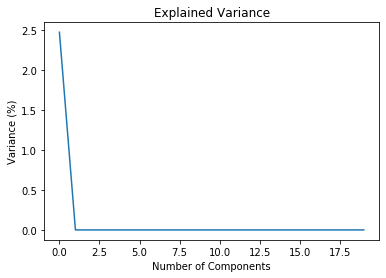

In [32]:
#Fitting the PCA algorithm with our Data
# pca = PCA().fit(data_rescaled)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(variance)# np.cumsum(transformer.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [ ]:
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py
